# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Anggun Sulis Setyawan
- **Email:** sul191120@gmail.com
- **ID Dicoding:** sulbae

## Menentukan Pertanyaan Bisnis

1) Bagaimana performa penjualan bulanan e-commerce year-to-date (tahun 2018)?
2) Kategori produk apa yang paling banyak terjual selama periode puncak trend penjualan tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [783]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from babel.numbers import format_currency
from datetime import datetime

import geopandas as gpd
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

#### users

In [784]:
# customers_dataset
customers_raw_df = pd.read_csv('./e-commerce-dataset/customers_dataset.csv')
customers_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- dataset customers berisi **99.441 baris data dan 5 kolom**.

In [785]:
# sellers_dataset
sellers_raw_df = pd.read_csv('./e-commerce-dataset/sellers_dataset.csv')
sellers_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- dataset sellers berisi **3.095 baris data dan 4 kolom**.

#### orders

In [786]:
# orders_dataset
orders_df = pd.read_csv('./e-commerce-dataset/orders_dataset.csv')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- dataset orders berisi **99.441 baris data dan 8 kolom**.

In [787]:
# order_items_dataset
order_items_df = pd.read_csv('./e-commerce-dataset/order_items_dataset.csv')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- dataset order_items berisi **112.650 baris data dan 7 kolom**.

In [788]:
# order_payments_dataset
order_payments_df = pd.read_csv('./e-commerce-dataset/order_payments_dataset.csv')
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- dataset order_payments berisi **103.886 baris data dan 5 kolom**.

In [789]:
# order_reviews_dataset
order_reviews_df = pd.read_csv('./e-commerce-dataset/order_reviews_dataset.csv')
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- dataset order_items berisi **99.224 baris data dan 7 kolom**.

#### products

In [790]:
# products_dataset
products_df = pd.read_csv('./e-commerce-dataset/products_dataset.csv')
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- dataset products berisi **32.951 baris data dan 9 kolom**.

In [791]:
# product_category_name_translation_dataset
product_cat_df = pd.read_csv('./e-commerce-dataset/product_category_name_translation.csv')
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- dataset product_cat berisi **71 baris data dan 2 kolom**.

### Assessing Data

#### customers_raw_df

In [792]:
customers_raw_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [793]:
print(customers_raw_df.shape[0])
print(customers_raw_df['customer_unique_id'].nunique())
print(customers_raw_df['customer_id'].nunique())

99441
96096
99441


In [794]:
# Cek missing values
print("Missing values: ", customers_raw_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", customers_raw_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
1) `customer_id` merupakan **primary key (PK)**
    - `customer_id` berperan sebagai nomor identitas akun yang digunakan pengguna, sedangkan `customer_unique_id` berperan sebagai identifier pengguna. 
    - Kolom `customer_id` memiliki jumlah nilai unik yang sesuai dengan total jumlah baris data, sedangkan jumlah nilai unik `customer_unique_id` kurang dari total jumlah baris data.
2) Tidak ada _missing value_ maupun _duplikasi data_.

#### sellers_raw_df

In [795]:
sellers_raw_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [796]:
# Cek missing values
print("Missing values: ", sellers_raw_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", sellers_raw_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
- `seller_id` merupakan **primary key (PK)**
- Tidak ada _missing value_ maupun _duplikasi data_.

#### orders_df

In [797]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [798]:
print(orders_df.shape[0])
print(orders_df['order_id'].nunique())

99441
99441


In [799]:
# Cek missing values
print("Missing values: ", orders_df.isnull().sum().sum())
print(orders_df.isnull().sum())
# Cek duplikasi data
print("Duplicate values: ", orders_df.duplicated().sum())

Missing values:  4908
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Duplicate values:  0


In [800]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- `order_id` merupakan **primary key (PK)**
- `customer_id` merupakan **foreign key (PK)** ke dataset customers.
- Terdapat 4908 missing values pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.
- Tidak ada duplikasi data.
- Data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` perlu diubah tipe datanya menjadi **datetime**.

#### order_items_df

In [801]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [802]:
print(order_items_df.shape[0])
print(order_items_df['order_id'].nunique())
print(order_items_df['order_item_id'].nunique())

112650
98666
21


In [803]:
# Cek missing values
print("Missing values: ", order_items_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", order_items_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


In [804]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- `order_id` dan `order_item_id` merupakan **composite primary key (PK)**
- `product_id` merupakan **foreign key (PK)** ke dataset product.
- `seller_id` merupakan **foreign key (PK)** ke dataset seller.
- Tidak ada missing values maupun duplikasi data.
- tipe data `shipping_limit_date` perlu diubah menjadi **datetime**.

#### order_payments_df

In [805]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [806]:
# Cek missing values
print("Missing values: ", order_payments_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", order_payments_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
- `order_id` merupakan **primary key (PK)**
- Tidak ada missing values maupun duplikasi data.

#### order_reviews_df

In [807]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [808]:
# Cek missing values
print("Missing values: ", order_reviews_df.isnull().sum().sum())
print(order_reviews_df.isnull().sum())
# Cek duplikasi data
print("Duplicate values: ", order_reviews_df.duplicated().sum())

Missing values:  145903
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Duplicate values:  0


**Insight:**
- `review_id` merupakan **primary key (PK)**
- `order_id` merupakan **foreign key (PK)** ke dataset orders.
- Terdapat 145.903 missing values dari kolom `review_comment_title` dan `review_comment_message`. Hal ini menunjukkan bahwa user sudah memberikan review score, hanya saja tidak menjelaskan ulasan lebih detail. Sehingga cukup gunakan data `review_score`.
- Tidak ada duplikasi data.

#### products_df

In [809]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [810]:
# Cek missing values
print("Missing values: ", products_df.isnull().sum().sum())
print(products_df.isnull().sum())
# Cek duplikasi data
print("Duplicate values: ", products_df.duplicated().sum())

Missing values:  2448
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplicate values:  0


**Insight:**
- `product_id` merupakan **primary key (PK)**
- `product_category_name` merupakan **foreign key (PK)** ke dataset product category.
- Terdapat 2.448 missing values dari kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, dan `review_comment_message`.
- Tidak ada duplikasi data.

#### product_cat_df

In [811]:
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [812]:
# Cek missing values
print("Missing values: ", product_cat_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", product_cat_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
- `product_category_name` merupakan **primary key (PK)**

### Cleaning Data

#### orders_df

In [813]:
# missing values handling
orders_df.dropna(inplace=True)

In [814]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [815]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [816]:
# Ubah tipe data ke datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [817]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight:**
- _missing values handling_ pada kolom date dilakukan dengan menghapus baris data yang tidak lengkap tersebut. Karena jumlah baris dengan _missing values_ tidak terlalu signifikan terhadap total data, maka cara ini masih aman.
- Data waktu sudah memiliki tipe data yang sesuai. Selanjutnya, dapat diolah sesuai kebutuhan.

#### order_items_df

In [818]:
# Ubah tipe data ke datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [819]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Data waktu sudah memiliki tipe data yang sesuai. Selanjutnya, dapat diolah sesuai kebutuhan.

#### products_df

In [820]:
# missing values handling
products_df.dropna(inplace=True)

In [821]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- _missing values handling_ dilakukan dengan menghapus baris data yang tidak lengkap tersebut. Jumlah baris data dengan _missing values_ relatif sedikit dibandingkan jumlah total data, maka cara ini masih aman.

## Exploratory Data Analysis (EDA)

### Analisis Trend Penjualan sepanjang tahun 2018

#### Merge Data

In [822]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [823]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [824]:
# Merge dataset orders_df, order_items_df
orders_detail_df = pd.merge(left=orders_df, right=order_items_df, 
                            on='order_id', 
                            how='right')

orders_detail_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [825]:
orders_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

#### Cleaning Data

In [826]:
# Cek Missing values
print("Missing values: ", orders_detail_df.isnull().sum())

Missing values:  order_id                            0
customer_id                      2470
order_status                     2470
order_purchase_timestamp         2470
order_approved_at                2470
order_delivered_carrier_date     2470
order_delivered_customer_date    2470
order_estimated_delivery_date    2470
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64


In [827]:
# Drop missing values
orders_detail_df.dropna(inplace=True)

orders_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110180 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_item_id                  110180 non-null  int64         
 9   product_id                     110180 non-null  object        
 10  seller_id                      110180 non-null  object        
 11  shipp

**Insight:**
- Setelah merge, terdapat baris data yang mengandung null yaitu pada kolom `customer_id`, `order_status`, `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`. Biasanya ini mengindikasikan error pada pencatatan transaksi sehingga dapat dianggap transaksi tidak valid karena status dan waktu transaksi tidak jelas. Oleh karena itu, sebaiknya data dieliminasi dari proses analisis.

#### Feature Selection

In [828]:
# Gunakan kolom secukupnya untuk analisis
transaction_df = orders_detail_df[['order_id', 'order_item_id', 'customer_id', 'order_purchase_timestamp', 'product_id', 'seller_id', 'price', 'freight_value']].copy()
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110180 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110180 non-null  object        
 1   order_item_id             110180 non-null  int64         
 2   customer_id               110180 non-null  object        
 3   order_purchase_timestamp  110180 non-null  datetime64[ns]
 4   product_id                110180 non-null  object        
 5   seller_id                 110180 non-null  object        
 6   price                     110180 non-null  float64       
 7   freight_value             110180 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.6+ MB


In [829]:
transaction_df['order_id'].nunique()

96461

#### Feature Engineering

In [830]:
transaction_df['sales'] = transaction_df['price'] + transaction_df['freight_value']
transaction_df.head()

,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04


#### Filter Data

In [831]:
sales_2018_df = transaction_df[transaction_df['order_purchase_timestamp'].dt.year == 2018]
sales_2018_df.head()

,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78
7,000576fe39319847cbb9d288c5617fa6,1,9ed5e522dd9dd85b4af4a077526d8117,2018-07-04 12:08:27,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,16150771dfd4776261284213b89c304e,2018-03-19 18:40:33,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,145.95,11.65,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,351d3cb2cee3c7fd0af6616c82df21d3,2018-07-02 13:59:39,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,65.39


In [832]:
sales_2018_df.sort_values(by='order_purchase_timestamp', ascending=False, inplace=True)
sales_2018_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19268\3017094491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2018_df.sort_values(by='order_purchase_timestamp', ascending=False, inplace=True)


,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales
23530,35a972d7f8436f405b56e36add1a7140,1,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,93.75
1722,03ef5dedbe7492bdae72eec50764c43f,1,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,33.23
9829,168626408cb32af0ffaf76711caae1dc,1,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,61.29
4925,0b223d92c27432930dfe407c6aea3041,2,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,255.48
4924,0b223d92c27432930dfe407c6aea3041,1,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,255.48


#### Pivot Table: Monthly Sales

In [833]:
monthly_trend_df = sales_2018_df.groupby(sales_2018_df['order_purchase_timestamp'].dt.month)['sales'].sum().reset_index()
monthly_trend_df

,order_purchase_timestamp,sales
0,1,1077887.46
1,2,966212.50
2,3,1120598.24
3,4,1132878.93
4,5,1128774.52
5,6,1011448.96
6,7,1027286.52
7,8,985491.64


In [834]:
# fsesuaikan format bulan 3 huruf pertama
monthly_trend_df['order_purchase_timestamp'] = monthly_trend_df['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
monthly_trend_df

,order_purchase_timestamp,sales
0,Jan,1077887.46
1,Feb,966212.50
2,Mar,1120598.24
3,Apr,1132878.93
4,May,1128774.52
5,Jun,1011448.96
6,Jul,1027286.52
7,Aug,985491.64


### Analisis Produk Terlaris Ketika Peak Sales

#### Merge 1: tambah nama produk bahasa inggris

In [835]:
# Ganti nama kategori produk dengan bahasa inggris
products_eng_df = pd.merge(
    left=products_df, 
    right=product_cat_df,
    on='product_category_name',
    how='left'
)

products_eng_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


#### Cleaning Data 1

In [836]:
# Cek missing values
products_eng_df.isnull().sum()

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64

In [837]:
# Missing values handling
products_eng_df.dropna(inplace=True)
print("Missing values: ", products_eng_df.isnull().sum().sum())

Missing values:  0


#### Feature Selection 1

In [838]:
# Pilih kolom yang diperlukan untuk analisis
products_eng_df = products_eng_df[['product_id', 'product_category_name_english']]
products_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32339
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32327 non-null  object
 1   product_category_name_english  32327 non-null  object
dtypes: object(2)
memory usage: 757.7+ KB


#### Merge 2: Gabungkan data transaksi 2018

In [839]:
product_sales_df = pd.merge(
    left=sales_2018_df,
    right=products_eng_df,
    on='product_id',
    how='left'
)

product_sales_df.head()

,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales,product_category_name_english
0,35a972d7f8436f405b56e36add1a7140,1,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,93.75,computers_accessories
1,03ef5dedbe7492bdae72eec50764c43f,1,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,33.23,party_supplies
2,168626408cb32af0ffaf76711caae1dc,1,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,61.29,health_beauty
3,0b223d92c27432930dfe407c6aea3041,2,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,255.48,kitchen_dining_laundry_garden_furniture
4,0b223d92c27432930dfe407c6aea3041,1,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,255.48,kitchen_dining_laundry_garden_furniture


In [840]:
product_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60319 entries, 0 to 60318
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       60319 non-null  object        
 1   order_item_id                  60319 non-null  int64         
 2   customer_id                    60319 non-null  object        
 3   order_purchase_timestamp       60319 non-null  datetime64[ns]
 4   product_id                     60319 non-null  object        
 5   seller_id                      60319 non-null  object        
 6   price                          60319 non-null  float64       
 7   freight_value                  60319 non-null  float64       
 8   sales                          60319 non-null  float64       
 9   product_category_name_english  59641 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 4.6+ MB


#### Cleaning Data 2

In [841]:
# Cek missing values
product_sales_df.isnull().sum()

order_id                           0
order_item_id                      0
customer_id                        0
order_purchase_timestamp           0
product_id                         0
seller_id                          0
price                              0
freight_value                      0
sales                              0
product_category_name_english    678
dtype: int64

In [842]:
# missing values handling: isi nilai dengan 'Unknown'
product_sales_df['product_category_name_english'].fillna('Unknown', inplace=True)
print("Missing values: ",product_sales_df.isnull().sum().sum())


Missing values:  0


C:\Users\ACER\AppData\Local\Temp\ipykernel_19268\169063679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_sales_df['product_category_name_english'].fillna('Unknown', inplace=True)


#### Feature Selection 2

In [843]:
# Gunakan kolom yang diperlukan untuk analisis
product_peak_sales_df = product_sales_df[['order_id', 'order_purchase_timestamp', 'product_category_name_english', 'sales']]
product_peak_sales_df.head()

,order_id,order_purchase_timestamp,product_category_name_english,sales
0,35a972d7f8436f405b56e36add1a7140,2018-08-29 15:00:37,computers_accessories,93.75
1,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,party_supplies,33.23
2,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,health_beauty,61.29
3,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,kitchen_dining_laundry_garden_furniture,255.48
4,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,kitchen_dining_laundry_garden_furniture,255.48


#### Filter Data: Peak Period

In [844]:
# Peak period: Mar, Apr, May
peak_period_df = product_peak_sales_df[product_peak_sales_df['order_purchase_timestamp'].dt.month.isin([3,4,5])]
peak_period_df

,order_id,order_purchase_timestamp,product_category_name_english,sales
21109,00c763284c0056eed753352f5559ff0a,2018-05-31 23:51:24,bed_bath_table,94.55
21110,74b1e5115fb6a89e2e7401e1bcf6fe59,2018-05-31 23:41:58,garden_tools,44.22
21111,6a07231081720ded5c208be252bdc004,2018-05-31 23:17:43,art,123.18
21112,3ac75a8eb75c784facff9f6f405758dc,2018-05-31 23:16:01,bed_bath_table,214.00
21113,b5117b798b05270121d510721a774801,2018-05-31 23:01:33,pet_shop,115.60
...,...,...,...,...
44758,409e6afee2a8d16df0be7d30f6278067,2018-03-01 00:40:25,office_furniture,601.19
44759,e3d7c52182ad0917d1d2dd351dc1ef3a,2018-03-01 00:15:48,baby,82.06
44760,ae825c311734d9ebfd9e6e67a8e3625e,2018-03-01 00:09:51,toys,41.69
44761,b5b967cc29ff5ce57bb11ffd9c2e9101,2018-03-01 00:00:37,computers_accessories,45.31


#### Pivot Table: Best Selling

In [845]:
# Analisis produk dengan penjualan terbanyak selama periode puncak
best_product_peak_df = peak_period_df.groupby(peak_period_df['order_purchase_timestamp'].dt.month)['product_category_name_english'].value_counts().reset_index(name='quantity')
best_product_peak_df

,order_purchase_timestamp,product_category_name_english,quantity
0,3,bed_bath_table,777
1,3,computers_accessories,750
2,3,sports_leisure,732
3,3,health_beauty,656
4,3,furniture_decor,583
...,...,...,...
195,5,diapers_and_hygiene,3
196,5,arts_and_craftmanship,1
197,5,fashion_male_clothing,1
198,5,flowers,1


In [846]:
# Top 5 Products March
best_mar_df = best_product_peak_df[best_product_peak_df['order_purchase_timestamp'] == 3].head(5)
best_mar_df

,order_purchase_timestamp,product_category_name_english,quantity
0,3,bed_bath_table,777
1,3,computers_accessories,750
2,3,sports_leisure,732
3,3,health_beauty,656
4,3,furniture_decor,583


In [847]:
# Top 5 Products April
best_apr_df = best_product_peak_df[best_product_peak_df['order_purchase_timestamp'] == 4].head(5)
best_apr_df

,order_purchase_timestamp,product_category_name_english,quantity
67,4,bed_bath_table,736
68,4,health_beauty,685
69,4,furniture_decor,586
70,4,sports_leisure,586
71,4,computers_accessories,526


In [848]:
# Top 5 Products May
best_may_df = best_product_peak_df[best_product_peak_df['order_purchase_timestamp'] == 5].head(5)
best_may_df

,order_purchase_timestamp,product_category_name_english,quantity
136,5,health_beauty,751
137,5,bed_bath_table,740
138,5,watches_gifts,625
139,5,housewares,618
140,5,furniture_decor,597


In [849]:
# Top 5 Products Mar - May
top_products_peak_df = best_product_peak_df.groupby('product_category_name_english')['quantity'].sum().reset_index()
top_5_peak_df = top_products_peak_df.sort_values(by='quantity', ascending=False).head(5)
top_5_peak_df = top_5_peak_df.rename(columns={'product_category_name_english': 'product', 'quantity': 'total_quantity'})
top_5_peak_df

,product,total_quantity
8,bed_bath_table,2253
44,health_beauty,2092
65,sports_leisure,1807
40,furniture_decor,1766
16,computers_accessories,1729


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan bulanan e-commerce year-to-date (tahun 2018)?

In [850]:
def sales_trend_viz(x, y, title:str):
    plt.figure(figsize=(12, 6))

    plt.plot(
        x,
        y,
        marker='o',
        linewidth=2,
        color='#72BCD4',
    )
    plt.axhline(y=y.mean(), color='red', linestyle='--', label=f'Average Sales: {y.mean():.2f}')

    plt.title(title, fontsize=16, loc="center")

    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.legend()
    plt.show()

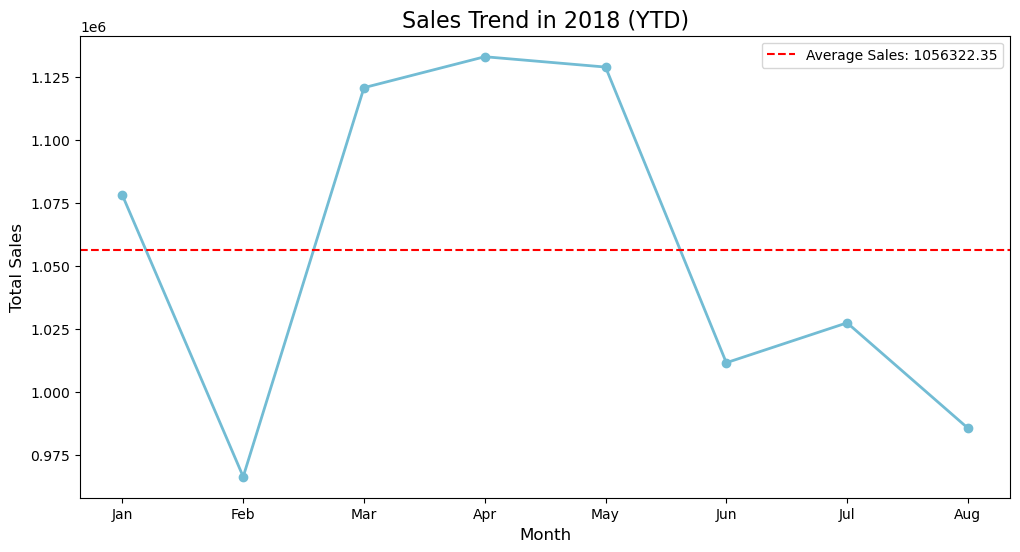

In [851]:
sales_trend_viz(monthly_trend_df['order_purchase_timestamp'], monthly_trend_df['sales'], title='Sales Trend in 2018 (YTD)')

**Insight:**
- Secara umum performa penjualan di bulan Agustus cenderung menurun jika dibandingkan dengan penjualan di awal tahun (Januari) 2018. 
- Sempat terjadi penurunan penjualan yang sangat signifikan di bulan Februari, sebelum kemudian pada bulan Maret melonjak tajam hingga melebihi performa di bulan Januari. Bahkan penjualan sempat stabil terjaga di atas 1,1 juta dolar selama periode Maret - Mei. Sayangnya, setelah itu, penjualan terus anjlok hingga jauh di bawah rata-rata Year-to-Date (YTD). 

### Pertanyaan 2: Kategori produk apa yang paling banyak terjual selama periode puncak trend penjualan tahun 2018?

In [852]:
def top_peak_viz(data_df, column_x, column_y):
    plt.figure(figsize=(10, 6))

    colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

    sns.barplot(
        x=data_df[column_x], 
        y=data_df[column_y], 
        data=data_df.head(5), 
        palette=colors
    )
    
    plt.title('Best Selling Product Categories')
    plt.ylabel('Product Category')
    plt.xlabel('Total Orders')
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19268\3093092212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


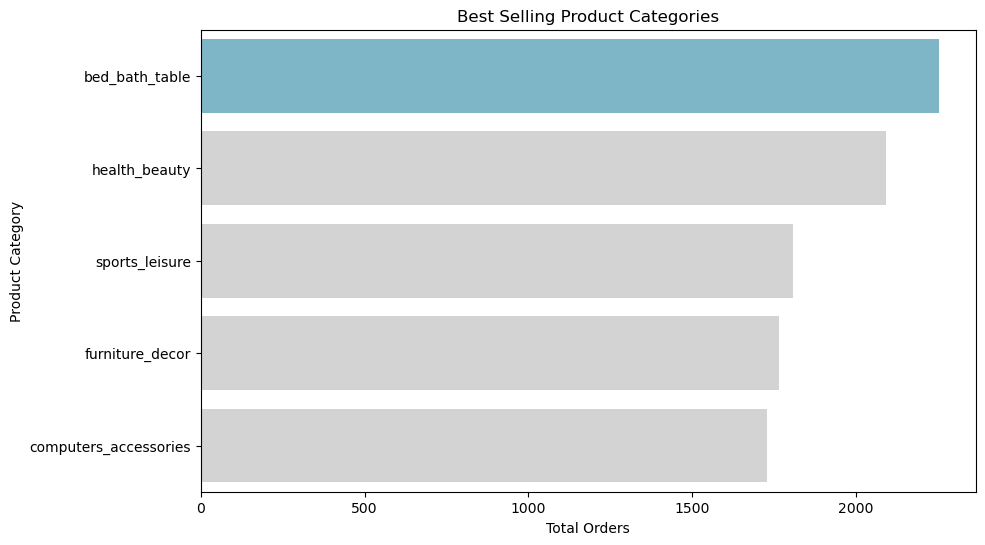

In [853]:
top_peak_viz(top_5_peak_df, column_x='total_quantity', column_y='product')

**Insight:**
- Pada periode puncak penjualan di bulan Maret - Mei, produk yang paling banyak di beli adalah produk kategori bed_bath_table dengan total pemesanan sebanyak 2253 kali selama 3 bulan tersebut. 
- Top 2 - 5 produk yang terbanyak dipesan berikutnya yaitu kategori produk health_beauty, sports_leisure, furniture_decor, dan computers_accessories dengan jumlah total sebanyak 1729 - 2092 pesanan.

## Analisis Lanjutan (Opsional)

### Data Preparation for Dashboard: Sales Page

#### Merge 1

In [854]:
# Merge 1
sales_data_df = pd.merge(
    left=orders_df, 
    right=order_items_df, 
    on='order_id', 
    how='left'
)

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_item_id                  110180 non-null  int64         
 9   product_id                     110180 non-null  object        
 10  seller_id                      110180 non-null  object        
 11  

In [855]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64
Duplikasi data:  0


#### Merge 2

In [856]:
# Merge 2
sales_data_df = pd.merge(
    left=sales_data_df,
    right=order_payments_df,
    on='order_id',
    how='left'
)

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115021 entries, 0 to 115020
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115021 non-null  object        
 1   customer_id                    115021 non-null  object        
 2   order_status                   115021 non-null  object        
 3   order_purchase_timestamp       115021 non-null  datetime64[ns]
 4   order_approved_at              115021 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115021 non-null  datetime64[ns]
 6   order_delivered_customer_date  115021 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115021 non-null  datetime64[ns]
 8   order_item_id                  115021 non-null  int64         
 9   product_id                     115021 non-null  object        
 10  seller_id                      115021 non-null  object        
 11  

In [857]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64
Duplikasi data:  0


In [858]:
# Missing value handling
sales_data_df = sales_data_df.dropna()

print("Missing Values: ", sales_data_df.isnull().sum().sum())

Missing Values:  0


#### Merge 3

In [859]:
# Merge 3
sales_data_df = pd.merge(
    left=sales_data_df,
    right=order_reviews_df,
    on='order_id',
    how='left'
)

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115703 entries, 0 to 115702
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115703 non-null  object        
 1   customer_id                    115703 non-null  object        
 2   order_status                   115703 non-null  object        
 3   order_purchase_timestamp       115703 non-null  datetime64[ns]
 4   order_approved_at              115703 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115703 non-null  datetime64[ns]
 6   order_delivered_customer_date  115703 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115703 non-null  datetime64[ns]
 8   order_item_id                  115703 non-null  int64         
 9   product_id                     115703 non-null  object        
 10  seller_id                      115703 non-null  object        
 11  

In [860]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                           861
review_score                        861
review_comment_title             102123
review_comment_message            67617
review_creation_date                861
review_answer_timestamp             861
dtype: int64
Duplikasi 

In [861]:
# Missing value handling
sales_data_df.dropna(subset='review_id', inplace=True)

print("Missing Values:\n", sales_data_df.isnull().sum())

Missing Values:
 order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101262
review_comment_message            66756
review_creation_date                  0
review_answer_timestamp               0
dtype: int64


In [862]:
# Hapus kolom "comment"
sales_data_df = sales_data_df.drop(columns=['review_comment_title', 'review_comment_message'])

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114842 entries, 0 to 115702
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   order_item_id                  114842 non-null  int64         
 9   product_id                     114842 non-null  object        
 10  seller_id                      114842 non-null  object        
 11  shipp

#### Merge 4

In [863]:
products_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32339
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32327 non-null  object
 1   product_category_name_english  32327 non-null  object
dtypes: object(2)
memory usage: 757.7+ KB


In [864]:
# Merge 4
sales_data_df = pd.merge(
    left=sales_data_df,
    right=products_eng_df,
    on='product_id',
    how='left'
)

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114842 entries, 0 to 114841
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   order_item_id                  114842 non-null  int64         
 9   product_id                     114842 non-null  object        
 10  seller_id                      114842 non-null  object        
 11  

In [865]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
product_category_name_english    1649
dtype: int64
Duplikasi data:  0


In [866]:
# missing values handling
sales_data_df['product_category_name_english'].fillna("unknown", inplace=True)

print("Missing Values: ", sales_data_df.isnull().sum())

Missing Values:  order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name_english    0
dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_19268\3339167992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data_df['product_category_name_english'].fillna("unknown", inplace=True)


In [867]:
# Periksa jumlah data setelah penanganan missing values dan duplikasi data
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114842 entries, 0 to 114841
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   order_item_id                  114842 non-null  int64         
 9   product_id                     114842 non-null  object        
 10  seller_id                      114842 non-null  object        
 11  

In [868]:
# Feature Selection
sales_data_df = sales_data_df.drop(columns=[
    'payment_sequential',
    'payment_installments',
    'review_creation_date',
    'review_answer_timestamp'
])

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114842 entries, 0 to 114841
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   order_item_id                  114842 non-null  int64         
 9   product_id                     114842 non-null  object        
 10  seller_id                      114842 non-null  object        
 11  

In [869]:
# Cek timeline minimum
sales_data_df.sort_values(by='order_purchase_timestamp', ascending=True, inplace=True)
sales_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_id,review_score,product_category_name_english
107676,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,1,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,boleto,45.46,9fe0f66724df77fd63fcc0c94a323978,4.0,watches_gifts
32906,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,1,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,boleto,39.09,dc62f1e20d7f280e54066b6a92841086,4.0,sports_leisure
106916,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,credit_card,35.61,f9fe37d91c506b29a0b4d9107f667bde,1.0,sports_leisure
113086,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,1,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,boleto,53.73,657654f17abc5a7ce8290f148efb3dd3,3.0,sports_leisure
102023,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,1,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,credit_card,133.46,444d04d7ca0131b3b40619f81d0facd5,1.0,furniture_decor


In [870]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
dtype: int64
Duplikasi data:  675


In [871]:
sales_data_df[sales_data_df.duplicated(keep=False)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,review_id,review_score,product_category_name_english
37118,b2f92b2f7047cd8b35580d629d7b3bfb,1cbeb91a58bd89ee2df1bc32f3311209,delivered,2016-10-05 08:04:21,2016-10-06 15:57:10,2016-11-11 07:31:31,2016-11-17 16:23:47,2016-11-25,1,8f1e43e0e3374ed8c84df748034d6179,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-10-21 16:27:28,59.9,11.31,voucher,20.0,815e1b04599377590d462178d524b69a,1.0,health_beauty
37117,b2f92b2f7047cd8b35580d629d7b3bfb,1cbeb91a58bd89ee2df1bc32f3311209,delivered,2016-10-05 08:04:21,2016-10-06 15:57:10,2016-11-11 07:31:31,2016-11-17 16:23:47,2016-11-25,1,8f1e43e0e3374ed8c84df748034d6179,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-10-21 16:27:28,59.9,11.31,voucher,20.0,815e1b04599377590d462178d524b69a,1.0,health_beauty
84898,1b3d11cf9f92c0f7baf627ab059621f8,85ed641fe825f188f1a67b317b5f540c,delivered,2017-01-06 23:31:23,2017-01-06 23:44:08,2017-01-09 09:33:56,2017-01-17 17:27:49,2017-02-16,1,b68cf84ede4fd1e14b1740de5b727d55,e24fc9fcd865784fb25705606fe3dfe7,2017-01-10 23:31:23,636.0,30.71,voucher,200.0,5b3e6a4905490b42830a938b0943ee88,5.0,health_beauty
84895,1b3d11cf9f92c0f7baf627ab059621f8,85ed641fe825f188f1a67b317b5f540c,delivered,2017-01-06 23:31:23,2017-01-06 23:44:08,2017-01-09 09:33:56,2017-01-17 17:27:49,2017-02-16,1,b68cf84ede4fd1e14b1740de5b727d55,e24fc9fcd865784fb25705606fe3dfe7,2017-01-10 23:31:23,636.0,30.71,voucher,200.0,5b3e6a4905490b42830a938b0943ee88,5.0,health_beauty
84896,1b3d11cf9f92c0f7baf627ab059621f8,85ed641fe825f188f1a67b317b5f540c,delivered,2017-01-06 23:31:23,2017-01-06 23:44:08,2017-01-09 09:33:56,2017-01-17 17:27:49,2017-02-16,1,b68cf84ede4fd1e14b1740de5b727d55,e24fc9fcd865784fb25705606fe3dfe7,2017-01-10 23:31:23,636.0,30.71,voucher,200.0,5b3e6a4905490b42830a938b0943ee88,5.0,health_beauty


In [872]:
# drop duplikasi data
sales_data_df.drop_duplicates(inplace=True)

print("Duplikasi data: ", sales_data_df.duplicated().sum())

Duplikasi data:  0


In [873]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114167 entries, 107676 to 101591
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   customer_id                    114167 non-null  object        
 2   order_status                   114167 non-null  object        
 3   order_purchase_timestamp       114167 non-null  datetime64[ns]
 4   order_approved_at              114167 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114167 non-null  datetime64[ns]
 6   order_delivered_customer_date  114167 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114167 non-null  datetime64[ns]
 8   order_item_id                  114167 non-null  int64         
 9   product_id                     114167 non-null  object        
 10  seller_id                      114167 non-null  object        
 11  

#### Merge 5

In [874]:
customers_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [875]:
# Merge 5
sales_data_df = pd.merge(
    left=sales_data_df,
    right=customers_raw_df,
    on='customer_id',
    how='left'
)

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   customer_id                    114167 non-null  object        
 2   order_status                   114167 non-null  object        
 3   order_purchase_timestamp       114167 non-null  datetime64[ns]
 4   order_approved_at              114167 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114167 non-null  datetime64[ns]
 6   order_delivered_customer_date  114167 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114167 non-null  datetime64[ns]
 8   order_item_id                  114167 non-null  int64         
 9   product_id                     114167 non-null  object        
 10  seller_id                      114167 non-null  object        
 11  

In [876]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64
Duplikasi data:  0


In [877]:
# Cek jumlah customer unik
print("Total customer_unique_id: ", sales_data_df['customer_unique_id'].nunique())

Total customer_unique_id:  92738


#### Merge 6

In [878]:
# Merge 6
sales_data_df = pd.merge(
    left=sales_data_df,
    right=sellers_raw_df,
    on='seller_id',
    how='left'
)

sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   customer_id                    114167 non-null  object        
 2   order_status                   114167 non-null  object        
 3   order_purchase_timestamp       114167 non-null  datetime64[ns]
 4   order_approved_at              114167 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114167 non-null  datetime64[ns]
 6   order_delivered_customer_date  114167 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114167 non-null  datetime64[ns]
 8   order_item_id                  114167 non-null  int64         
 9   product_id                     114167 non-null  object        
 10  seller_id                      114167 non-null  object        
 11  

In [879]:
# cek missing values
print("Missing Values:\n", sales_data_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sales_data_df.duplicated().sum())

Missing Values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64
Duplikasi data:  0


In [880]:
# Cek timeline min dan max
print(sales_data_df['order_purchase_timestamp'].min().date())
print(sales_data_df['order_purchase_timestamp'].max().date())

2016-10-03
2018-08-29


In [881]:
# Cek jumlah seller_id unik
print("Total seller_id: ", sales_data_df['seller_id'].nunique())

Total seller_id:  2965


In [882]:
# Export sales_data_df
sales_data_df.to_csv('sales_data.csv', index=False)

### Analisis Kinerja Layanan

#### Delivery Services

In [883]:
# Order Status Distribution
sales_data_df['order_status'].value_counts()

order_status
delivered    114160
canceled          7
Name: count, dtype: int64

In [884]:
# Delivery Success Rate
delivery_success_rate = ((sales_data_df['order_status'] == 'delivered').sum() / len(sales_data_df['order_status']) * 100)

print(f"Delivery Success Rate: {delivery_success_rate:.2f}%")

Delivery Success Rate: 99.99%


In [885]:
# Buat delivery_df
delivery_df = sales_data_df[[
    'order_id', 
    'order_status', 
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]].copy()

delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_status                   114167 non-null  object        
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   order_approved_at              114167 non-null  datetime64[ns]
 4   order_delivered_carrier_date   114167 non-null  datetime64[ns]
 5   order_delivered_customer_date  114167 non-null  datetime64[ns]
 6   order_estimated_delivery_date  114167 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(2)
memory usage: 6.1+ MB


In [886]:
# Delivery Performance Analysis
delivery_df['days_to_delivered'] = (delivery_df['order_delivered_customer_date'] - delivery_df['order_purchase_timestamp']).dt.days
delivery_df['estimated_delivery_days'] = (delivery_df['order_estimated_delivery_date'] - delivery_df['order_purchase_timestamp']).dt.days

delivery_df['delivery_performance'] = (delivery_df['estimated_delivery_days'] - delivery_df['days_to_delivered']).apply(lambda x: 'Early' if x > 0 else ('On-Time' if x == 0 else 'Late'))

delivery_df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_delivered,estimated_delivery_days,delivery_performance
0,3b697a20d9e427646d92567910af6d57,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,23,23,On-Time
1,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,24,34,Early
2,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,35,52,Early
3,a41c8759fbe7aab36ea07e038b2d4465,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,30,56,Early
4,d207cc272675637bfed0062edffd0818,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,27,50,Early


In [887]:
# Cek distribusi delivery performance
delivery_df['delivery_performance'].value_counts()

delivery_performance
Early      104375
Late         8236
On-Time      1556
Name: count, dtype: int64

In [888]:
delivery_proportion = delivery_df['delivery_performance'].value_counts(normalize=True).mul(100).round(2)
print(delivery_proportion)

delivery_performance
Early      91.42
Late        7.21
On-Time     1.36
Name: proportion, dtype: float64


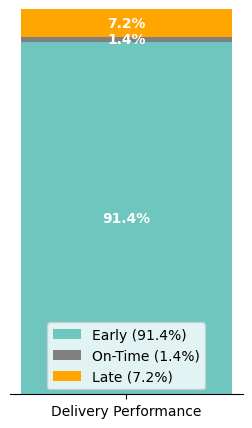

In [889]:
# Visualisasi delivery performance
color_mapping = {
    'Early': '#6EC6BF', # teal
    'On-Time': '#808080', # grey
    'Late': '#FFA500' # orange
}

fig, ax = plt.subplots(figsize=(3, 5))

bottom = 0

for key, color in color_mapping.items():
    value = delivery_proportion.get(key, 0)

    ax.bar(
        x="Delivery Performance",
        height=value,
        color=color,
        label=f"{key} ({value:.1f}%)",
        bottom=bottom
    )
    if value > 0:
        ax.text(
            x=0,
            y=bottom + value / 2,
            s=f"{value:.1f}%",
            va='center',
            ha='center',
            color='white',
            fontweight='bold'
        )
    
    bottom += value

ax.set_ylim(0, 100)
ax.set_ylabel('Percentage (%)')
ax.legend(bbox_to_anchor=(0.5, 0.1), loc='center')

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=0)
plt.show()


#### Customer Satisfaction

In [890]:
# Review Score Distribution
sales_data_df['review_score'].value_counts()

review_score
5.0    65651
4.0    22001
1.0    13045
3.0     9601
2.0     3869
Name: count, dtype: int64

In [891]:
# Review Rating: Overall
print("Avg. Rating: ", sales_data_df['review_score'].mean().round(2))

Avg. Rating:  4.08


### Data Preparation for Dashboard: Users Page

#### Load Dataset Geo

In [892]:
# Load geolocation dataset
geolocation_df = pd.read_csv("./e-commerce-dataset/geolocation_dataset.csv")

geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [893]:
# cek missing values
print("Missing values:\n", geolocation_df.isnull().sum())

# cek duplikasi data
print("Jumlah duplikasi data:", geolocation_df.duplicated().sum())

Missing values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah duplikasi data: 261831


In [894]:
# Cek 5 baris data yang duplikat
geo_duplicate = geolocation_df[geolocation_df.duplicated(keep=False)]
print(geo_duplicate.head(5))

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
6                         1047       -23.546273       -46.641225   
7                         1013       -23.546923       -46.634264   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
6        sao paulo                SP  
7        sao paulo                SP  


*Insight*:
- Satu zip code dapat memiliki banyak titik lokasi geolocation (misalnya dalam satu desa, masing-masing pengguna memiliki lokasi yang berbeda-beda)

In [895]:
# Ambil nilai rata-rata geolocation sehingga hanya 1 koordinat unutk setiap 1 zip code
geo_grouped_df = geolocation_df.groupby(by="geolocation_zip_code_prefix").agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

geo_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 445.8 KB


In [896]:
# cek missing values
print("Missing values:\n", geo_grouped_df.isnull().sum())

# cek duplikasi data
print("Jumlah duplikasi data:", geo_grouped_df.duplicated().sum())

Missing values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64
Jumlah duplikasi data: 0


In [897]:
print("Jumlah zip code unik: ", geo_grouped_df['geolocation_zip_code_prefix'].nunique())

Jumlah zip code unik:  19015


#### Customers Data

In [898]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   customer_id                    114167 non-null  object        
 2   order_status                   114167 non-null  object        
 3   order_purchase_timestamp       114167 non-null  datetime64[ns]
 4   order_approved_at              114167 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114167 non-null  datetime64[ns]
 6   order_delivered_customer_date  114167 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114167 non-null  datetime64[ns]
 8   order_item_id                  114167 non-null  int64         
 9   product_id                     114167 non-null  object        
 10  seller_id                      114167 non-null  object        
 11  

In [899]:
customers_df = sales_data_df.copy()

customers_df.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_type',
 'payment_value',
 'review_id',
 'review_score',
 'product_category_name_english',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

In [900]:
# Feature Selection
customers_df = customers_df[[
    'order_id',
    'order_item_id',
    'order_purchase_timestamp',
    'product_id',
    'product_category_name_english',
    'customer_id',
    'customer_unique_id',
    'payment_type',
    'payment_value',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state'
]]

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_item_id                  114167 non-null  int64         
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   product_id                     114167 non-null  object        
 4   product_category_name_english  114167 non-null  object        
 5   customer_id                    114167 non-null  object        
 6   customer_unique_id             114167 non-null  object        
 7   payment_type                   114167 non-null  object        
 8   payment_value                  114167 non-null  float64       
 9   customer_zip_code_prefix       114167 non-null  int64         
 10  customer_city                  114167 non-null  object        
 11  

In [901]:
# Merge with geo dataset
customers_df = pd.merge(
    left=customers_df,
    right=geo_grouped_df,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_item_id                  114167 non-null  int64         
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   product_id                     114167 non-null  object        
 4   product_category_name_english  114167 non-null  object        
 5   customer_id                    114167 non-null  object        
 6   customer_unique_id             114167 non-null  object        
 7   payment_type                   114167 non-null  object        
 8   payment_value                  114167 non-null  float64       
 9   customer_zip_code_prefix       114167 non-null  int64         
 10  customer_city                  114167 non-null  object        
 11  

In [902]:
# Feature Selection
customers_df = customers_df.drop(columns=['geolocation_zip_code_prefix'])

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_item_id                  114167 non-null  int64         
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   product_id                     114167 non-null  object        
 4   product_category_name_english  114167 non-null  object        
 5   customer_id                    114167 non-null  object        
 6   customer_unique_id             114167 non-null  object        
 7   payment_type                   114167 non-null  object        
 8   payment_value                  114167 non-null  float64       
 9   customer_zip_code_prefix       114167 non-null  int64         
 10  customer_city                  114167 non-null  object        
 11  

In [903]:
# cek missing values
print("Missing Values:\n", customers_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", customers_df.duplicated().sum())

Missing Values:
 order_id                           0
order_item_id                      0
order_purchase_timestamp           0
product_id                         0
product_category_name_english      0
customer_id                        0
customer_unique_id                 0
payment_type                       0
payment_value                      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
geolocation_lat                  302
geolocation_lng                  302
dtype: int64
Duplikasi data:  679


In [904]:
# Lihat city yang data geo nya null
cek_geo_null = customers_df.loc[
    customers_df['geolocation_lat'].isnull()
].groupby('customer_city').size().sort_values(ascending=False)

cek_geo_null.head()

customer_city
brasilia      186
maracanau       8
salvador        7
sinop           3
sao mateus      3
dtype: int64

In [905]:
# Cek 5 baris data yang duplikat
cus_duplicate = customers_df[customers_df.duplicated(keep=False)]
cus_duplicate.head(5)

,order_id,order_item_id,order_purchase_timestamp,product_id,product_category_name_english,customer_id,customer_unique_id,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
317,b19169c7cb8391fb8561e094d61c531a,2,2016-10-10 15:49:59,bdcec8e22b04a8f4241d87bcfe9ea877,furniture_decor,620732fed5579e0bdfdddee02aad4c54,0ecf7f65b5ff3b9e61b637e59f495e0a,credit_card,129.03,30411,belo horizonte,MG,-19.926104,-43.966235
318,b19169c7cb8391fb8561e094d61c531a,2,2016-10-10 15:49:59,bdcec8e22b04a8f4241d87bcfe9ea877,furniture_decor,620732fed5579e0bdfdddee02aad4c54,0ecf7f65b5ff3b9e61b637e59f495e0a,credit_card,129.03,30411,belo horizonte,MG,-19.926104,-43.966235
319,b19169c7cb8391fb8561e094d61c531a,1,2016-10-10 15:49:59,bdcec8e22b04a8f4241d87bcfe9ea877,furniture_decor,620732fed5579e0bdfdddee02aad4c54,0ecf7f65b5ff3b9e61b637e59f495e0a,credit_card,129.03,30411,belo horizonte,MG,-19.926104,-43.966235
320,b19169c7cb8391fb8561e094d61c531a,1,2016-10-10 15:49:59,bdcec8e22b04a8f4241d87bcfe9ea877,furniture_decor,620732fed5579e0bdfdddee02aad4c54,0ecf7f65b5ff3b9e61b637e59f495e0a,credit_card,129.03,30411,belo horizonte,MG,-19.926104,-43.966235
321,b19169c7cb8391fb8561e094d61c531a,3,2016-10-10 15:49:59,bdcec8e22b04a8f4241d87bcfe9ea877,furniture_decor,620732fed5579e0bdfdddee02aad4c54,0ecf7f65b5ff3b9e61b637e59f495e0a,credit_card,129.03,30411,belo horizonte,MG,-19.926104,-43.966235


In [906]:
# missing values handling
customers_df.dropna(inplace=True)

print("Missing Values:\n", customers_df.isnull().sum())

# Hapus duplikasi data
customers_df.drop_duplicates()

print("Duplikasi data: ", customers_df.duplicated().sum())

Missing Values:
 order_id                         0
order_item_id                    0
order_purchase_timestamp         0
product_id                       0
product_category_name_english    0
customer_id                      0
customer_unique_id               0
payment_type                     0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
dtype: int64
Duplikasi data:  674


In [907]:
# Periksa jumlah customer unik yang merepresentasikan jumlah pelanggan sebenarnya
print("Jumlah customer unik:", customers_df['customer_unique_id'].nunique())

Jumlah customer unik: 92485


In [908]:
# Periksa jumlah customer_id
print("Jumlah customer_id:", customers_df['customer_id'].nunique())

Jumlah customer_id: 95551


In [909]:
# Periksa duplikasi data berdasarkan customer id
print("Duplikasi data: ", customers_df.duplicated(subset='customer_unique_id').sum())

Duplikasi data:  21380


*Insight*:
- Satu customer_unique_id dapat memiliki customer_id lebih dari satu.
- Kemungkinan, sistem mencatat setiap 1 transaksi akan diberi 1 customer_id unik sehingga wajar bila 1 customer_unique_id melakukan lebih dari 1 transaksi, maka akan memiliki lebih dari satu customer_id. 

In [910]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113865 entries, 0 to 114166
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113865 non-null  object        
 1   order_item_id                  113865 non-null  int64         
 2   order_purchase_timestamp       113865 non-null  datetime64[ns]
 3   product_id                     113865 non-null  object        
 4   product_category_name_english  113865 non-null  object        
 5   customer_id                    113865 non-null  object        
 6   customer_unique_id             113865 non-null  object        
 7   payment_type                   113865 non-null  object        
 8   payment_value                  113865 non-null  float64       
 9   customer_zip_code_prefix       113865 non-null  int64         
 10  customer_city                  113865 non-null  object        
 11  custo

In [911]:
# Export customers_df
customers_df.to_csv('customers_data.csv', index=False)

#### Seller Data

In [912]:
sellers_df = sales_data_df.copy()

sellers_df.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_type',
 'payment_value',
 'review_id',
 'review_score',
 'product_category_name_english',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

In [913]:
# Feature Selection
sellers_df = sellers_df[[
    'order_id',
    'order_item_id',
    'order_purchase_timestamp',
    'product_id',
    'product_category_name_english',
    'customer_id',
    'customer_unique_id',
    'payment_type',
    'payment_value',
    'order_approved_at',
    'shipping_limit_date',
    'order_status',
    'order_delivered_carrier_date',
    'seller_id',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
    'review_id',
    'review_score'
]]

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_item_id                  114167 non-null  int64         
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   product_id                     114167 non-null  object        
 4   product_category_name_english  114167 non-null  object        
 5   customer_id                    114167 non-null  object        
 6   customer_unique_id             114167 non-null  object        
 7   payment_type                   114167 non-null  object        
 8   payment_value                  114167 non-null  float64       
 9   order_approved_at              114167 non-null  datetime64[ns]
 10  shipping_limit_date            114167 non-null  datetime64[ns]
 11  

In [914]:
# Merge with geo data
sellers_df = pd.merge(
    left=sellers_df,
    right=geo_grouped_df,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_item_id                  114167 non-null  int64         
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   product_id                     114167 non-null  object        
 4   product_category_name_english  114167 non-null  object        
 5   customer_id                    114167 non-null  object        
 6   customer_unique_id             114167 non-null  object        
 7   payment_type                   114167 non-null  object        
 8   payment_value                  114167 non-null  float64       
 9   order_approved_at              114167 non-null  datetime64[ns]
 10  shipping_limit_date            114167 non-null  datetime64[ns]
 11  

In [915]:
# Feature Selection
sellers_df = sellers_df.drop(columns=['geolocation_zip_code_prefix'])

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114167 entries, 0 to 114166
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114167 non-null  object        
 1   order_item_id                  114167 non-null  int64         
 2   order_purchase_timestamp       114167 non-null  datetime64[ns]
 3   product_id                     114167 non-null  object        
 4   product_category_name_english  114167 non-null  object        
 5   customer_id                    114167 non-null  object        
 6   customer_unique_id             114167 non-null  object        
 7   payment_type                   114167 non-null  object        
 8   payment_value                  114167 non-null  float64       
 9   order_approved_at              114167 non-null  datetime64[ns]
 10  shipping_limit_date            114167 non-null  datetime64[ns]
 11  

In [916]:
# cek missing values
print("Missing Values:\n", sellers_df.isnull().sum())

# cek duplikasi data
print("Duplikasi data: ", sellers_df.duplicated().sum())

Missing Values:
 order_id                           0
order_item_id                      0
order_purchase_timestamp           0
product_id                         0
product_category_name_english      0
customer_id                        0
customer_unique_id                 0
payment_type                       0
payment_value                      0
order_approved_at                  0
shipping_limit_date                0
order_status                       0
order_delivered_carrier_date       0
seller_id                          0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
review_id                          0
review_score                       0
geolocation_lat                  261
geolocation_lng                  261
dtype: int64
Duplikasi data:  0


In [917]:
# missing values handling
sellers_df = sellers_df.dropna()

print("Missing Values:\n", sellers_df.isnull().sum())

Missing Values:
 order_id                         0
order_item_id                    0
order_purchase_timestamp         0
product_id                       0
product_category_name_english    0
customer_id                      0
customer_unique_id               0
payment_type                     0
payment_value                    0
order_approved_at                0
shipping_limit_date              0
order_status                     0
order_delivered_carrier_date     0
seller_id                        0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
review_id                        0
review_score                     0
geolocation_lat                  0
geolocation_lng                  0
dtype: int64


In [918]:
# Periksa jumlah data setelah penanganan missing values dan duplikasi data
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113906 entries, 0 to 114166
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113906 non-null  object        
 1   order_item_id                  113906 non-null  int64         
 2   order_purchase_timestamp       113906 non-null  datetime64[ns]
 3   product_id                     113906 non-null  object        
 4   product_category_name_english  113906 non-null  object        
 5   customer_id                    113906 non-null  object        
 6   customer_unique_id             113906 non-null  object        
 7   payment_type                   113906 non-null  object        
 8   payment_value                  113906 non-null  float64       
 9   order_approved_at              113906 non-null  datetime64[ns]
 10  shipping_limit_date            113906 non-null  datetime64[ns]
 11  order

In [919]:
# Cek jumlah seller unik
print("Jumlah Seller Unik: ", sellers_df['seller_id'].nunique())

Jumlah Seller Unik:  2958


In [920]:
# Export sellers_df
sellers_df.to_csv('sellers_data.csv', index=False)

### Analisis Perilaku Customer

#### Tipe Pembayaran Favorit

In [921]:
# Payment Type Distribution
sales_data_df['payment_type'].value_counts()

payment_type
credit_card    84709
boleto         22322
voucher         5482
debit_card      1654
Name: count, dtype: int64

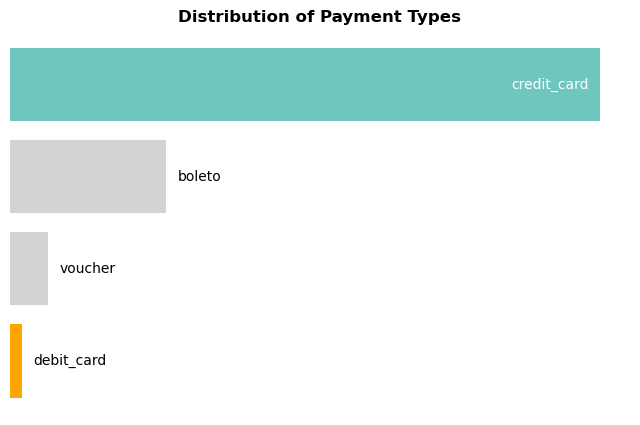

In [922]:
# Visualisasi payment type
freq_pay = sales_data_df['payment_type'].value_counts().sort_values(ascending=True)
median_value = (freq_pay.max())/2

fig, ax = plt.subplots(figsize=(8, 5))

pallete = ['#FFA500', '#D3D3D3', '#D3D3D3', '#6EC6BF']

bars = ax.barh(
    y=freq_pay.index,
    width=freq_pay.values,
    color=pallete
)

for bar, value, label in zip(bars, freq_pay.values, freq_pay.index):
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height()/2

    if value >= median_value:
        ax.text(
            x=width - (width * 0.02),
            y=y_pos,
            s=label,
            va='center',
            ha='right',
            color='white',
        )
    
    else:
        ax.text(
            x=width + (max(freq_pay) * 0.02),
            y=y_pos,
            s=label,
            va='center',
            ha='left',
            color='black',
        )

ax.set_xlabel('Payment Type')


ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Distribution of Payment Types', fontweight='bold')
plt.show()

### Segmentasi Customer

In [923]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113865 entries, 0 to 114166
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113865 non-null  object        
 1   order_item_id                  113865 non-null  int64         
 2   order_purchase_timestamp       113865 non-null  datetime64[ns]
 3   product_id                     113865 non-null  object        
 4   product_category_name_english  113865 non-null  object        
 5   customer_id                    113865 non-null  object        
 6   customer_unique_id             113865 non-null  object        
 7   payment_type                   113865 non-null  object        
 8   payment_value                  113865 non-null  float64       
 9   customer_zip_code_prefix       113865 non-null  int64         
 10  customer_city                  113865 non-null  object        
 11  custo

In [924]:
recent_date = customers_df['order_purchase_timestamp'].max()

print(recent_date)

2018-08-29 15:00:37


In [925]:
snapshot_date = recent_date + pd.Timedelta(days=1)

print(snapshot_date)

2018-08-30 15:00:37


In [926]:
# Analisis RFM
rfm_df = customers_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm_df.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

rfm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [927]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92485 entries, 0 to 92484
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  92485 non-null  object 
 1   recency             92485 non-null  int64  
 2   frequency           92485 non-null  int64  
 3   monetary            92485 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


#### Recency

In [928]:
# Binning recency
rfm_df['cus_status'] = pd.cut(
    rfm_df['recency'],
    bins=[-1, 60, 90, 180, float('inf')],
    labels=['Active', 'Rarely Active', 'Need to Touch', 'Inactive']
)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,cus_status
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,Need to Touch
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,Need to Touch
2,0000f46a3911fa3c0805444483337064,537,1,86.22,Inactive
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,Inactive
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,Inactive


In [929]:
rfm_df['cus_status'].value_counts()

cus_status
Inactive         54694
Need to Touch    19473
Active           12338
Rarely Active     5980
Name: count, dtype: int64

#### Frequency

In [930]:
rfm_df['frequency'].describe()

count    92485.000000
mean         1.033151
std          0.208393
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

In [931]:
rfm_df['frequency'].value_counts()

frequency
1     89731
2      2533
3       174
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

In [932]:
# Binning frequency
rfm_df['cus_activities'] = pd.cut(
    rfm_df['frequency'],
    bins=[-1, 0, 5, 10, float('inf')],
    labels=['Tidak Pernah', 'Jarang', 'Sering', 'Sangat Sering']
)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,cus_status,cus_activities
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,Need to Touch,Jarang
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,Need to Touch,Jarang
2,0000f46a3911fa3c0805444483337064,537,1,86.22,Inactive,Jarang
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,Inactive,Jarang
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,Inactive,Jarang


In [933]:
rfm_df['cus_activities'].value_counts()

cus_activities
Jarang           92475
Sering               9
Sangat Sering        1
Tidak Pernah         0
Name: count, dtype: int64

#### Monetary

In [934]:
rfm_df['monetary'].describe()

count     92485.000000
mean        211.853452
std         630.447126
min           6.180000
25%          63.610000
50%         112.940000
75%         201.840000
max      109312.640000
Name: monetary, dtype: float64

In [ ]:
# Binning monetray
rfm_df['cus_value'] = pd.cut(
    rfm_df['monetary'],
    bins=[-1, 100, 500, 1000, float('inf')],
    labels=['Low', 'Middle-Low', 'Middle-High', 'High']
)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,cus_status,cus_activities,cus_value
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,Need to Touch,Jarang,Middle-Low
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,Need to Touch,Jarang,Low
2,0000f46a3911fa3c0805444483337064,537,1,86.22,Inactive,Jarang,Low
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,Inactive,Jarang,Low
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,Inactive,Jarang,Middle-Low


In [936]:
rfm_df['cus_value'].value_counts()

cus_value
Middle-Low     44313
Low            41287
Middle-High     4571
High            2314
Name: count, dtype: int64

#### Clustering

In [937]:
# Scoring
rfm_df['cus_status_score'] = rfm_df['cus_status'].map({'Inactive': 1, 'Need to Touch': 2, 'Rarely Active': 3, 'Active': 4})
rfm_df['cus_activities_score'] = rfm_df['cus_activities'].map({'Tidak Pernah': 1, 'Jarang': 2, 'Sering': 3, 'Sangat Sering': 4})
rfm_df['cus_value_score'] = rfm_df['cus_value'].map({'Low': 1, 'Middle-Low': 2, 'Middle-High': 3, 'High': 4})

In [938]:
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,cus_status,cus_activities,cus_value,cus_status_score,cus_activities_score,cus_value_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,Need to Touch,Jarang,Middle-Low,2,2,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,Need to Touch,Jarang,Low,2,2,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,Inactive,Jarang,Low,1,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,Inactive,Jarang,Low,1,2,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,Inactive,Jarang,Middle-Low,1,2,2


In [939]:
rfm_df['cus_status_score'] = rfm_df['cus_status_score'].astype(int)
rfm_df['cus_activities_score'] = rfm_df['cus_activities_score'].astype(int)
rfm_df['cus_value_score'] = rfm_df['cus_value_score'].astype(int)

In [940]:
# Total Score
rfm_df['cus_rating'] = (
    rfm_df['cus_status_score'] * 0.2 +
    rfm_df['cus_activities_score'] * 0.3 +
    rfm_df['cus_value_score'] * 0.5
)

rfm_df.head()

,customer_unique_id,recency,frequency,monetary,cus_status,cus_activities,cus_value,cus_status_score,cus_activities_score,cus_value_score,cus_rating
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,Need to Touch,Jarang,Middle-Low,2,2,2,2.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,Need to Touch,Jarang,Low,2,2,1,1.5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,Inactive,Jarang,Low,1,2,1,1.3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,Inactive,Jarang,Low,1,2,1,1.3
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,Inactive,Jarang,Middle-Low,1,2,2,1.8


In [941]:
rfm_df['cus_rating'].value_counts()

cus_rating
1.8    26033
1.3    24727
2.0     9434
1.5     8488
2.4     5836
1.9     5579
2.2     3009
2.3     2622
1.7     2493
2.8     1309
2.5      997
2.9      636
3.0      553
2.7      313
3.4      285
3.2      163
3.1        3
3.5        2
2.1        1
3.3        1
3.7        1
Name: count, dtype: int64

In [942]:
def customer_segment(row):
    if row['cus_rating'] > 3.3:
        return 'Super'
    elif row['cus_rating'] > 2.3:
        return 'Regular'
    elif row['cus_rating'] > 1.3:
        return 'Potential'
    else:
        return 'Risk'

In [943]:
rfm_df['cus_status'].value_counts()

cus_status
Inactive         54694
Need to Touch    19473
Active           12338
Rarely Active     5980
Name: count, dtype: int64

In [ ]:
rfm_df['segment'] = rfm_df.apply(customer_segment, axis=1)

rfm_df['segment'].value_counts()

Segment
Potential    57659
Risk         24727
Regular       9811
Super          288
Name: count, dtype: int64

In [945]:
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,cus_status,cus_activities,cus_value,cus_status_score,cus_activities_score,cus_value_score,cus_rating,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,Need to Touch,Jarang,Middle-Low,2,2,2,2.0,Potential
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,Need to Touch,Jarang,Low,2,2,1,1.5,Potential
2,0000f46a3911fa3c0805444483337064,537,1,86.22,Inactive,Jarang,Low,1,2,1,1.3,Risk
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,Inactive,Jarang,Low,1,2,1,1.3,Risk
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,Inactive,Jarang,Middle-Low,1,2,2,1.8,Potential


### Analisis Geospatial Users

In [946]:
# customer geolocation data
customers_gdf = gpd.GeoDataFrame(
    customers_df,
    geometry=gpd.points_from_xy(customers_df['geolocation_lng'], customers_df['geolocation_lat']),
    crs='EPSG:4326'
)

customers_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 113865 entries, 0 to 114166
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113865 non-null  object        
 1   order_item_id                  113865 non-null  int64         
 2   order_purchase_timestamp       113865 non-null  datetime64[ns]
 3   product_id                     113865 non-null  object        
 4   product_category_name_english  113865 non-null  object        
 5   customer_id                    113865 non-null  object        
 6   customer_unique_id             113865 non-null  object        
 7   payment_type                   113865 non-null  object        
 8   payment_value                  113865 non-null  float64       
 9   customer_zip_code_prefix       113865 non-null  int64         
 10  customer_city                  113865 non-null  object        
 1

In [947]:
customers_gdf.head()

,order_id,order_item_id,order_purchase_timestamp,product_id,product_category_name_english,customer_id,customer_unique_id,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geometry
0,3b697a20d9e427646d92567910af6d57,1,2016-10-03 09:44:50,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,boleto,45.46,4106,sao paulo,SP,-23.581451,-46.635029,POINT (-46.63503 -23.58145)
1,be5bc2f0da14d8071e2d45451ad119d9,1,2016-10-03 16:56:50,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,boleto,39.09,98280,panambi,RS,-28.293541,-53.502238,POINT (-53.50224 -28.29354)
2,65d1e226dfaeb8cdc42f665422522d14,1,2016-10-03 21:01:41,9c7bdf67b06b419aefb93cfdfc96c55d,sports_leisure,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,credit_card,35.61,22770,rio de janeiro,RJ,-22.936911,-43.360973,POINT (-43.36097 -22.93691)
3,a41c8759fbe7aab36ea07e038b2d4465,1,2016-10-03 21:13:36,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,6f989332712d3222b6571b1cf5b835ce,61db744d2f835035a5625b59350c6b63,boleto,53.73,90040,porto alegre,RS,-30.041161,-51.213661,POINT (-51.21366 -30.04116)
4,d207cc272675637bfed0062edffd0818,1,2016-10-03 22:06:03,107177bf61755f05c604fe57e02467d6,furniture_decor,b8cf418e97ae795672d326288dfab7a7,8d3a54507421dbd2ce0a1d58046826e0,credit_card,133.46,13185,hortolandia,SP,-22.892792,-47.173849,POINT (-47.17385 -22.89279)


In [948]:
# save customers_gdf
customers_gdf.to_csv('customers_geo.csv', index=False)

In [949]:
# seller geolocation data
sellers_gdf = gpd.GeoDataFrame(
    sellers_df,
    geometry=gpd.points_from_xy(sellers_df['geolocation_lng'], sellers_df['geolocation_lat']),
    crs='EPSG:4326'
)

sellers_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 113906 entries, 0 to 114166
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113906 non-null  object        
 1   order_item_id                  113906 non-null  int64         
 2   order_purchase_timestamp       113906 non-null  datetime64[ns]
 3   product_id                     113906 non-null  object        
 4   product_category_name_english  113906 non-null  object        
 5   customer_id                    113906 non-null  object        
 6   customer_unique_id             113906 non-null  object        
 7   payment_type                   113906 non-null  object        
 8   payment_value                  113906 non-null  float64       
 9   order_approved_at              113906 non-null  datetime64[ns]
 10  shipping_limit_date            113906 non-null  datetime64[ns]
 1

In [950]:
sellers_gdf.head()

,order_id,order_item_id,order_purchase_timestamp,product_id,product_category_name_english,customer_id,customer_unique_id,payment_type,payment_value,order_approved_at,...,order_delivered_carrier_date,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,geolocation_lat,geolocation_lng,geometry
0,3b697a20d9e427646d92567910af6d57,1,2016-10-03 09:44:50,3ae08df6bcbfe23586dd431c40bddbb7,watches_gifts,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,boleto,45.46,2016-10-06 15:50:54,...,2016-10-23 14:02:13,522620dcb18a6b31cd7bdf73665113a9,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,-24.959184,-53.462644,POINT (-53.46264 -24.95918)
1,be5bc2f0da14d8071e2d45451ad119d9,1,2016-10-03 16:56:50,fd7fd78fd3cbc1b0a6370a7909c0a629,sports_leisure,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,boleto,39.09,2016-10-06 16:03:44,...,2016-10-21 16:33:46,f09b760d23495ac9a7e00d29b769007c,15802,catanduva,SP,dc62f1e20d7f280e54066b6a92841086,4.0,-21.143389,-48.995314,POINT (-48.99531 -21.14339)
2,65d1e226dfaeb8cdc42f665422522d14,1,2016-10-03 21:01:41,9c7bdf67b06b419aefb93cfdfc96c55d,sports_leisure,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,credit_card,35.61,2016-10-04 10:18:57,...,2016-10-25 12:14:28,ed49da7cadefc454d6a67de249eab240,5571,sao paulo,SP,f9fe37d91c506b29a0b4d9107f667bde,1.0,-23.594556,-46.787489,POINT (-46.78749 -23.59456)
3,a41c8759fbe7aab36ea07e038b2d4465,1,2016-10-03 21:13:36,b72b39418216e944bb34e35f4d3ea8c7,sports_leisure,6f989332712d3222b6571b1cf5b835ce,61db744d2f835035a5625b59350c6b63,boleto,53.73,2016-10-05 03:11:49,...,2016-10-25 11:57:59,45d33f715e24d15a6ccf5c17b3a23e3c,18015,sorocaba,SP,657654f17abc5a7ce8290f148efb3dd3,3.0,-23.502755,-47.430451,POINT (-47.43045 -23.50275)
4,d207cc272675637bfed0062edffd0818,1,2016-10-03 22:06:03,107177bf61755f05c604fe57e02467d6,furniture_decor,b8cf418e97ae795672d326288dfab7a7,8d3a54507421dbd2ce0a1d58046826e0,credit_card,133.46,2016-10-04 10:28:07,...,2016-10-21 14:23:37,cca3071e3e9bb7d12640c9fbe2301306,14940,ibitinga,SP,444d04d7ca0131b3b40619f81d0facd5,1.0,-21.757321,-48.829744,POINT (-48.82974 -21.75732)


In [951]:
# save sellers_gdf
sellers_gdf.to_csv('sellers_geo.csv', index=False)

## Conclusion

1) Berdasarkan hasil analisis performa penjualan year-to-date (2018), secara umum saat ini penjualan sedang mengalami penurunan performa. Penjualan sempat menyentuh titik tertingginya di bulan April dengan angka pendapatan mencapai 1,133 juta dolar sebelum akhirnya menyentuh titik terendahnya di bulan Agustus dengan angka pendapatan sebesar 985,5 ribu dolar.
2) Kategori produk yang paling banyak terjual selama periode puncak di bulan Maret - Mei adalah produk-produk bed_bath_table.

## Requirement

In [312]:
!pip freeze > requirements.txt